Nama : Agung Marbun
Submission Proyek Akhir

In [1]:
import tensorflow as tf

Berhubung data yang digunakan sudah saya download maka saya hanya perlu menemukan lokasi filenya yang saya buat(upload) di folder content

In [2]:
import zipfile, os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/rockpaperscissors')
zip_ref.close()
 
base_dir = '/content/rockpaperscissors/rockpaperscissors/rps-cv-images'

In [3]:
os.listdir('/content/rockpaperscissors/rockpaperscissors')

['paper', 'scissors', 'rps-cv-images', 'rock', 'README_rpc-cv-images.txt']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4) # karena validasi data yang diminta adalah sebesar 40%

In [5]:
train_datagen

In [6]:
# Membuat generator untuk data latih dan validasi
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    shuffle=True,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
# Model dan kompilasi
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 17, 128)      0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
# Mendefinisikan callback untuk menghentikan pelatihan jika akurasi mencapai threshold
accuracy_threshold = 0.96
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= accuracy_threshold:
            print('\nFor Epoch', epoch,
                  '\nAccuracy telah mencapai %2.2f%%' %(logs['accuracy']*100),
                  'training telah berhenti')
            self.model.stop_training = True

In [11]:
# Pelatihan model
model.fit(train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[MyCallbacks()])

Epoch 1/20
25/25 - 40s - loss: 1.0941 - accuracy: 0.3675 - val_loss: 0.9455 - val_accuracy: 0.6438 - 40s/epoch - 2s/step
Epoch 2/20
25/25 - 37s - loss: 0.6271 - accuracy: 0.7532 - val_loss: 0.3165 - val_accuracy: 0.9000 - 37s/epoch - 1s/step
Epoch 3/20
25/25 - 38s - loss: 0.2631 - accuracy: 0.9162 - val_loss: 0.2869 - val_accuracy: 0.9250 - 38s/epoch - 2s/step
Epoch 4/20
25/25 - 39s - loss: 0.2373 - accuracy: 0.9156 - val_loss: 0.2202 - val_accuracy: 0.9438 - 39s/epoch - 2s/step
Epoch 5/20
25/25 - 38s - loss: 0.1897 - accuracy: 0.9237 - val_loss: 0.1785 - val_accuracy: 0.9312 - 38s/epoch - 2s/step
Epoch 6/20
25/25 - 38s - loss: 0.2420 - accuracy: 0.9091 - val_loss: 0.4701 - val_accuracy: 0.8500 - 38s/epoch - 2s/step
Epoch 7/20
25/25 - 34s - loss: 0.1933 - accuracy: 0.9338 - val_loss: 0.1389 - val_accuracy: 0.9563 - 34s/epoch - 1s/step
Epoch 8/20
25/25 - 37s - loss: 0.2373 - accuracy: 0.9299 - val_loss: 0.2540 - val_accuracy: 0.9000 - 37s/epoch - 1s/step
Epoch 9/20
25/25 - 34s - loss: 0

Proses pelatihan model memakan waktu kurang lebih 10 menit.

Saving 3XEQ73XMn7zaww2T.png to 3XEQ73XMn7zaww2T.png
1/1 [==============================] - 0s 254ms/step
3XEQ73XMn7zaww2T.png
Gambar: Paper


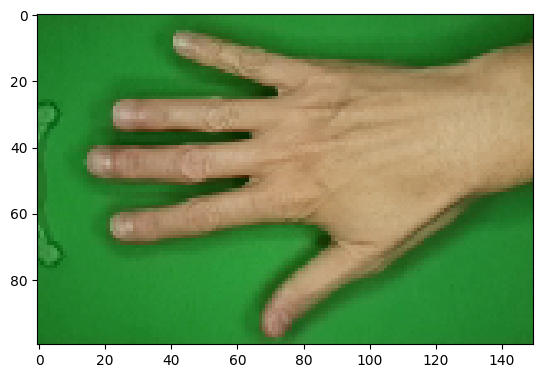

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images (Gambar)
  path = fn
  img = load_img(path, target_size=(100, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0, 0]==1:
    print('Gambar: Paper')
  elif classes[0, 1]==1:
    print('Gambar: Rock')
  elif classes[0, 2]==1:
    print('Gambar: Scissor')
  else:
    print('Gambar: Tidak Ada')

Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9.png
1/1 [==============================] - 0s 41ms/step
1CXgK9fgGdSRggD9.png
Gambar: Scissor


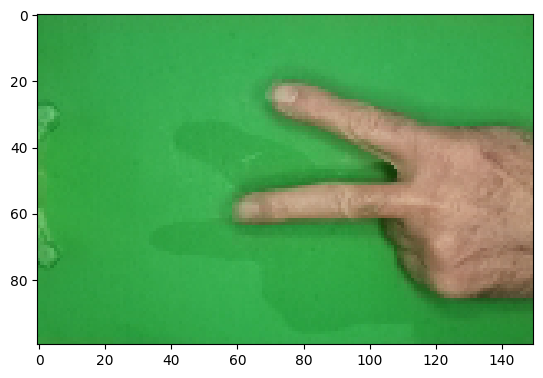

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images (Gambar)
  path = fn
  img = load_img(path, target_size=(100, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0, 0]==1:
    print('Gambar: Paper')
  elif classes[0, 1]==1:
    print('Gambar: Rock')
  elif classes[0, 2]==1:
    print('Gambar: Scissor')
  else:
    print('Gambar: Tidak Ada')

Saving 0OEXfEooCXlljaEl.png to 0OEXfEooCXlljaEl.png
1/1 [==============================] - 0s 38ms/step
0OEXfEooCXlljaEl.png
Gambar: Rock


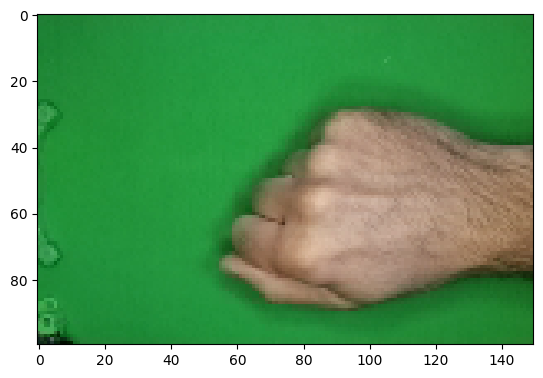

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images (Gambar)
  path = fn
  img = load_img(path, target_size=(100, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0, 0]==1:
    print('Gambar: Paper')
  elif classes[0, 1]==1:
    print('Gambar: Rock')
  elif classes[0, 2]==1:
    print('Gambar: Scissor')
  else:
    print('Gambar: Tidak Ada')